<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div class="alert alert-info" role="alert">
   
<p>Введение:< Отток клиентов>
   <p>Есть банк «Бета-Банка» из него стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
<p>Нам нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
<p>Дополнительно измерим AUC-ROC, сравнивним её значение с F1-мерой.
<p>Нужно довести метрику до 0.59

In [6]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.3.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached scikit_learn-1.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

Загрузили все нужные библиотеки

In [9]:
bank = pd.read_csv('/home/anna/datasets/Churn.csv')

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
bank.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [12]:
bank['Tenure'].value_counts().sum()

9091

In [13]:
bank['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [14]:
bank['Tenure'] =bank['Tenure'].fillna(0)

<div class="alert alert-block alert-info">
<b>Медиана и радномное заполнение - не повлияет на распределение и по минимуму исказит природу данных, которая нам не до конца известна
</div>

In [15]:
bank['Tenure'].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

In [16]:
bank['Tenure'] = bank['Tenure'].astype (int)

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<div class="alert alert-info" role="alert">
<p>Мы видим проблему с одни из столбцов : Tenure — сколько лет человек является клиентом банка.
<p>1) не правильно определен тип данных, мы его изменили на int64. Важная поправка, мы можем поменять тип , только после того, как избавимся от пропусков. 
<p>2) у нас в этом столбце есть пропуски, которые составляют 10 % от общего числа столбца. Сделать замену методами (средним и медианой) не является правильным решением, так как другие ячейки не могут сделать прогноз на пропуски. Мной было принято решение заменить пропуски на 0 ( на сурагатное значение).


In [18]:
bank.describe().round(0)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.0,15690941.0,651.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0
std,2887.0,71936.0,97.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0
min,1.0,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,2501.0,15628528.0,584.0,32.0,2.0,0.0,1.0,0.0,0.0,51002.0,0.0
50%,5000.0,15690738.0,652.0,37.0,4.0,97199.0,1.0,1.0,1.0,100194.0,0.0
75%,7500.0,15753234.0,718.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0
max,10000.0,15815690.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


<div class="alert alert-info" role="alert">
Есть некие странности в столбцах :
    1)EstimatedSalary — предполагаемая зарплата - минимальная зарплата 12.0 . Это или ошибка программы, или человеческий фактор ошибки. 

In [19]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Вывод

Отлично, все три региона потенциально прибыльные, для определения наиболее выгодного с точки зрения окупаемости вложений и рисков убытка проведём расчёт вероятности в следующей главе.

Загрузили и подготовили данные.
В столбце ['Tenure'] убрали пропуски и привели к типу int64.
Столбец ['EstimatedSalary'] минимальная предполагаемая зп под вопросом, поработаем дальше и решим, что с ним делать.
    <p> Нам нунжо привести 2 столбца Geography 	Gender к OHE

## Исследование задачи

In [20]:
#Удалим столбцы не нужные, не имеют для нас существенного интереса
drop = ['RowNumber','CustomerId', 'Surname']
bank = bank.drop(drop, axis=1)
bank.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
bank = pd.get_dummies(bank, drop_first=True, columns=['Gender', 'Geography'])

In [22]:
bank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [23]:
target = bank['Exited'] #целевой признак
features = bank.drop(['Exited'],axis = 1) #признаки

Выделили целевой и признаки

In [24]:
features_train,features_test, target_train,target_test = train_test_split(
    features,target,
    test_size=0.4,
    random_state=12345)

In [25]:
print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


<div class="alert alert-info" role="alert">
Разбили данные на выборку обучающую и тестовую
Вывели размеры обучающей

In [26]:
features_valid,features_test,target_valid,target_test = train_test_split(
    features_test,target_test,
    test_size=0.5,
    random_state=12345)

In [27]:
print(features_valid.shape)
print(target_valid.shape)

(2000, 11)
(2000,)


<div class="alert alert-info" role="alert">
 Разбили данные на валидационную и тестовую выборку в соотношении 1 к 1.

In [28]:
#список численных признаков
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [29]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [30]:
#Масштабирование для обучабщей выборке
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,1,0,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,1,0
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,1,0,0
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,0,1,0


In [31]:
#Масштабирование для тестовой выборки
pd.options.mode.chained_assignment = None
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7041,-2.226392,-0.088482,-0.825373,-1.233163,0.830152,1,0,0.647083,1,0,0
5709,-0.087120,0.006422,1.426375,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.139662,0.722307,-0.891560,1,1,-1.369334,1,0,1
7775,-0.253277,0.101325,1.748053,-1.233163,0.830152,1,0,0.075086,1,0,1
8735,0.785204,-0.847708,1.748053,0.615625,-0.891560,0,1,-1.070919,1,0,0


In [32]:
#Масштабирование для валидационной выборки
pd.options.mode.chained_assignment = None
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
8532,-0.699824,-0.373192,-0.825373,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.503694,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.468729,0.438711,-0.891560,1,0,-1.367107,1,1,0
7365,-0.876366,-0.278288,1.748053,1.239884,-0.891560,1,1,-0.786517,0,0,1
7367,-0.481743,0.291132,1.748053,-1.233163,0.830152,1,0,1.358533,1,0,1


In [33]:
best_model_forest = None
best_depth_forest = 0
best_est_forest = 0
best_result_forest = 0
for est in range(1, 11):
    for depth in range(1, 6):
        model_forest = RandomForestClassifier(
            random_state=12345, n_estimators=est,max_depth = depth) # заданная глубина дерева от 1 до 5
        model_forest.fit(features_train, target_train) # обучаем модель
        predictions_valid_forest = model_forest.predict(features_valid) # предсказания 
        result_forest = accuracy_score(predictions_valid_forest, target_valid)
        if best_result_forest < result_forest:
            best_model_forest = model_forest
            best_depth_forest = depth
            best_est_forest = est
            best_result_forest = result_forest

In [34]:
print("Accuracy лучшей модели ЛЕСА:",best_result_forest)
print('n_estimators=', best_est_forest, end = ";")
print('max_depth=', best_depth_forest, end = "")

Accuracy лучшей модели ЛЕСА: 0.859
n_estimators= 5;max_depth= 5

In [35]:
best_model_tree = None
best_depth_tree = 0
best_result_tree = 0
for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth) # заданная глубина дерева от 1 до 5
    model_tree.fit(features_train, target_train) # обучаем модель
    predictions_valid_tree = model_tree.predict(features_valid) # предсказания 
    result_tree = accuracy_score(predictions_valid_tree, target_valid)
    if best_result_tree < result_tree:
        best_model_tree = model_tree
        best_depth_tree = depth
        best_result_tree = result_tree

In [36]:
print("Accuracy лучшей модели деревьев:",best_result_tree)
print('max_depth=', best_depth_tree, end = "")

Accuracy лучшей модели деревьев: 0.853
max_depth= 5

In [37]:
model_log = LogisticRegression(random_state=123456, max_iter=100)
model_log.fit(features_train, target_train) 
predictions_valid_log = model_log.predict(features_valid)
accuracy_log = model_log.score(features_train, target_train)

In [38]:
print("Accuracy лучшей модели ЛЕСА:",best_result_forest)
print('n_estimators=', best_est_forest, end = ";")
print('max_depth=', best_depth_forest, end = "")
print()
print("Accuracy лучшей модели деревьев:",best_result_tree)
print('max_depth=', best_depth_tree, end = "")
print('Accuracy Логистической регресии:', accuracy_log )

Accuracy лучшей модели ЛЕСА: 0.859
n_estimators= 5;max_depth= 5
Accuracy лучшей модели деревьев: 0.853
max_depth= 5Accuracy Логистической регресии: 0.8185


<div class="alert alert-info" role="alert">
Модель случайного леса, показала себя лучше всего

0    0.7963
1    0.2037
Name: Exited, dtype: float64


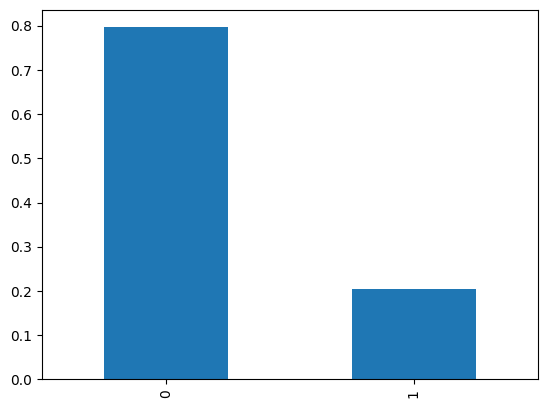

In [39]:
#Чтобы оценить адекватность модели, проверим, 
#как часто в целевом признаке встречается класс «1» или «0».
class_frequency = bank['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind='bar');

In [40]:
#создадим константную модель
#Кроме того, сравним качество предсказаний с константной моделью.
#За константу примем пример 0, так как это значение встречается почти в 80% случаев.
target_pred_constant= pd.Series(0,index=target.index)
print(accuracy_score(target,target_pred_constant))

0.7963


<div class="alert alert-info" role="alert">
Данные указыват 80% (остаются) против 20(ухлоядт) о дисбалансе.

# Проверка моделей без учета дисбаланса

Посмотрим на каждую модель метрики :
1)Полнота
2)Точность
3)F1-мера
4)Матрицу ошибок
5)Соотношение ответов моделей (сколько 0, сколько 1)

In [41]:
model_forest = RandomForestClassifier(
            random_state=12345, n_estimators=5,max_depth = 5) # заданная глубина дерева 5
model_forest.fit(features_train, target_train) # обучаем модель
prediction_valid_forest = model_forest.predict(features_valid)
forest_share = pd.Series(model_forest.predict(features_valid)).value_counts(normalize = True)
print("Полнота лес" , recall_score(target_valid, prediction_valid_forest))
print("Точность лес", precision_score(target_valid, prediction_valid_forest))
print("F1-мера лес", f1_score(target_valid, prediction_valid_forest))
print("Матрицa ошибок лес", confusion_matrix(target_valid, prediction_valid_forest))
print("Accuracy_лес:", accuracy_score(target_valid, prediction_valid_forest))

print()

model_tree = DecisionTreeClassifier(random_state=12345, max_depth = 5) # заданная глубина дерева 5
model_tree.fit(features_train, target_train) # обучаем модель
prediction_valid_tree = model_tree.predict(features_valid)
tree_share = pd.Series(model_tree.predict(features_valid)).value_counts(normalize = True)
print("Полнота дерево" , recall_score(target_valid, prediction_valid_tree))
print("Точность дерево", precision_score(target_valid, prediction_valid_tree))
print("F1-мера дерево", f1_score(target_valid, prediction_valid_tree))
print("Матрицa ошибок дерево", confusion_matrix(target_valid, prediction_valid_tree))
print("Accuracy_дерево:", accuracy_score(target_valid, prediction_valid_tree))

print()


model_log = LogisticRegression(random_state=123456, max_iter=100)
model_log.fit(features_train, target_train)
prediction_valid_log = model_log.predict(features_valid)
log_share = pd.Series(model_log.predict(features_valid)).value_counts(normalize = True)
print("Полнота логистическая" , recall_score(target_valid, prediction_valid_log))
print("Точность логичстическая", precision_score(target_valid, prediction_valid_log))
print("F1-мера логистическая", f1_score(target_valid, prediction_valid_log))
print("Матрицa ошибок логистическая", confusion_matrix(target_valid, prediction_valid_log))
print("Accuracy_log:", accuracy_score(target_valid, prediction_valid_log))

print()

print("Доли ответов:" "Дерево решений",tree_share,
      "Случайный лес ", forest_share,
      "Логистческая регрессия", log_share , end='')

Полнота лес 0.4138755980861244
Точность лес 0.8238095238095238
F1-мера лес 0.5509554140127388
Матрицa ошибок лес [[1545   37]
 [ 245  173]]
Accuracy_лес: 0.859

Полнота дерево 0.4138755980861244
Точность дерево 0.7792792792792793
F1-мера дерево 0.5406249999999999
Матрицa ошибок дерево [[1533   49]
 [ 245  173]]
Accuracy_дерево: 0.853

Полнота логистическая 0.23684210526315788
Точность логичстическая 0.5657142857142857
F1-мера логистическая 0.33389544688026984
Матрицa ошибок логистическая [[1506   76]
 [ 319   99]]
Accuracy_log: 0.8025

Доли ответов:Дерево решений 0    0.889
1    0.111
dtype: float64 Случайный лес  0    0.895
1    0.105
dtype: float64 Логистческая регрессия 0    0.9125
1    0.0875
dtype: float64

In [42]:
#Матрицы ошибок наглядно демонстрируют то, что несмотря на то, что значение accuracy достаточно высокое, для всех трех моделей наблюдается остаточно сильный дисбаланс классов.
#К примеру, для моделей Дерево решений и Случайный лес ситуация схожая - факт того, что клиент не ушел (0), модели определяют правильно примерно в 95% случаев,
#в то время как результат предсказаний по факту ухода (1) в среднем всего 45%.

<div class="alert alert-info" role="alert">
<p>Таким образом, обучив модели без учета дисбаланса классов, наилучшее значение метрики F1-score демонстрирует модель "Случайный лес ", в то время как наибольшее значение метрики accuracy наблюдается так же у  Random Forest.
<p>"Логистческая регрессия": Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.
<p>Матрица показала, что дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания (FP).
<p>Случайный лес примерно равную пропорцию позитивных и негативных предсказаний, выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно позитивным предсказаниям (FP).


## Борьба с дисбалансом

Нам понадобяться:
    1) Взвешивание влассов
    2) Увеличение выборки
    3) Уменьшение выборки

1) Взвешивание влассов

In [43]:
#Начнем с леса подберем подходящие гиперпараметры и обучим модель 

In [44]:
%%time

best_model = None
best_f1 = 0
for est in range(10,115,10):
    for depth in range(1,10):
        model_forest = RandomForestClassifier(
            random_state=12345,
            n_estimators=est,
            max_depth = depth,
            class_weight='balanced')
        model_forest.fit(features_train, target_train) # обучаем модель
        prediction_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, prediction_valid_forest)
        if f1_forest > best_f1:
            best_model = model_forest 
            best_est = est
            best_depth = depth
            
        
print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели: ', f1_forest)

Оптимальное количество оценок = 110
Оптимальная глубина дерева = 9
Качество модели:  0.6182237600922723
CPU times: user 48.1 s, sys: 89.3 ms, total: 48.2 s
Wall time: 48.2 s


In [45]:
# обучаем модель с оптимальными значениями гиперпараметров

model_forest = RandomForestClassifier(
            random_state=12345,
            n_estimators=50,
            max_depth = 3,
            class_weight='balanced') 
model_forest.fit(features_train, target_train) # обучаем модель
prediction_valid_forest = model_forest.predict(features_valid)

In [46]:
print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

#Вероятность классов:
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_one_valid))


Recall_forest: 0.34210526315789475
Precision_forest: 0.8362573099415205
F1_forest: 0.4855687606112054
ROC-AUC_forest: 0.8285625064269686


<div class="alert alert-info" role="alert">
Полнота выше , чем точнось. Их лучше смотреть в совокупе.
F1-оценка представляет собой гармоническое среднее точности и полноты: и здесь она 62% 
ROC-AUC на высоте и показатель хороший в 85% . Модель сможет различать тех кто уходит и тех, кто нет, в 85% случаев

In [47]:
#Подходящие гиперпараметры для дерева

In [48]:
%%time

best_model = None
best_f1 = 0
for depth in range(1,10):
    model_tree = DecisionTreeClassifier(
        random_state=12345,
        max_depth = depth,
        class_weight='balanced')
    model_tree.fit(features_train, target_train) # обучаем модель
    prediction_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, prediction_valid_tree)
    if f1_tree > best_f1:
        best_model = model_tree 
        best_depth = depth
        
print('Оптимальная глубина дерева =', best_depth)
print('Качество модели:', f1_tree)

Оптимальная глубина дерева = 9
Качество модели: 0.5320197044334976
CPU times: user 440 ms, sys: 0 ns, total: 440 ms
Wall time: 456 ms


In [49]:
# обучаем модель с оптимальными значениями гиперпараметров

model_tree = DecisionTreeClassifier(
        random_state=12345,
        max_depth = 9,
        class_weight='balanced') 
model_tree.fit(features_train, target_train) # обучаем модель
prediction_valid_tree = model_tree.predict(features_valid)



In [50]:
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

#Вероятность классов:
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_tree:", roc_auc_score(target_valid, probabilities_one_valid))


Recall_tree: 0.4138755980861244
Precision_tree: 0.7792792792792793
F1_tree: 0.5406249999999999
ROC-AUC_tree: 0.7620275044005831


<div class="alert alert-info" role="alert">
Здесь так же видим тенденцию: полнота выше чем точность, но нас больше интересует метрика F1- 54% ( меньше в численном эквиваленте, чем в лесу)
ROC-AUC - 76 % ( так же показатель меньше леса)   

In [51]:
#Логитическая модель 

model_log = LogisticRegression(
    random_state=12345, 
    max_iter=100,
    solver='liblinear',
    class_weight='balanced')
model_log.fit(features_train, target_train)
prediction_valid_log = model_log.predict(features_valid)


In [52]:

print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_log:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_log: 0.23684210526315788
Precision_log: 0.5657142857142857
F1_log: 0.33389544688026984
ROC-AUC_log: 0.7635798063138539


<div class="alert alert-info" role="alert">
Полнота выше точности.
F1 мера показывает себя не лучшим образом.
ROC-AUC 76% показатель схож с деревом 

<div class="alert alert-info" role="alert">
##Увеличивыем выборку


In [53]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat=4
    
    # сцепляем выборки
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # перемешиваем значения, чтобы они не шли друг за другом 
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


In [54]:
# случайный лес - подберем лучшие гиперпараметры
best_model = None
for est in range(10, 80, 10):
    for depth in range(1, 10):
        model_forest = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_model = model_forest
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)



Оптимальное количество оценок = 70
Оптимальная глубина дерева = 9


In [55]:
model_forest = RandomForestClassifier(random_state=12345, 
                                      n_estimators=70, 
                                      max_depth=9)
model_forest.fit(features_upsampled, target_upsampled)
predictions_valid_forest = model_forest.predict(features_valid)



In [56]:
print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_forest: 0.69377990430622
Precision_forest: 0.5675146771037182
F1_forest: 0.6243272335844994
ROC-AUC_forest: 0.8517290813518108


<div class="alert alert-info" role="alert">
Полнота и точность практически равны. 
Показатели метрики F1 как и в взвешивание классов очень близки друг к другу
ROC-AUC как и в взвешивание классов составляет 85%

In [57]:
# дерево решений - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_model = model_tree
        best_depth = depth

print('Оптимальная глубина дерева =', best_depth) 
print('Качество модели - ', f1_tree)


Оптимальная глубина дерева = 9
Качество модели -  0.5314960629921259


In [58]:
model_tree = DecisionTreeClassifier(random_state=12345,
                                    max_depth=9)
model_tree.fit(features_upsampled, target_upsampled)
predictions_valid_tree = model_tree.predict(features_valid)


In [59]:
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_tree:", roc_auc_score(target_valid, probabilities_one_valid))


Recall_tree: 0.645933014354067
Precision_tree: 0.451505016722408
F1_tree: 0.5314960629921259
ROC-AUC_tree: 0.7605258621211113


<div class="alert alert-info" role="alert">
Полнота выше чем точность.
F1 метрика не лучшем образом себя показывет 
ROC-AUC среднее значение

In [60]:
# Логистическая регрессия 
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear')
model_log.fit(features_upsampled, target_upsampled)
predictions_valid_log = model_log.predict(features_valid)


In [61]:
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_log:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_log: 0.6842105263157895
Precision_log: 0.3803191489361702
F1_log: 0.4888888888888888
ROC-AUC_log: 0.7634769748183815


<div class="alert alert-info" role="alert">
Эта модель показала себя хуже всех по метрике F1, но незначительно лучше по метрике ROC-AUC

<div class="alert alert-info" role="alert">
# Уменьшаем выборку и смотрим результаты сравнивая с предыдущими тестами


In [62]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # fractioning samples
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] +
                                   [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


In [63]:
# случайный лес - подберем лучшие гиперпараметры

best_model = None
for est in range(10, 111, 10):
    for depth in range(1, 10):
        model_forest = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_forest.fit(features_downsampled, target_downsampled)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_model = model_forest
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)


Оптимальное количество оценок = 110
Оптимальная глубина дерева = 9


In [64]:
# Нашли гиперпараметры оптимальные, на них и будет строить модель

model_forest = RandomForestClassifier(random_state=12345, 
                                      n_estimators=110, 
                                      max_depth=9)
model_forest.fit(features_downsampled, target_downsampled)
predictions_valid_forest = model_forest.predict(features_valid)


In [65]:
print("Recall_forest:", recall_score(target_valid, predictions_valid_forest))
print("Precision_forest:", precision_score(target_valid, predictions_valid_forest))
print("F1_forest:", f1_score(target_valid, predictions_valid_forest))

probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_forest: 0.7488038277511961
Precision_forest: 0.49682539682539684
F1_forest: 0.5973282442748092
ROC-AUC_forest: 0.8468143407593802


<div class="alert alert-info" role="alert">
Полнота у нас лучшей показатель. Тогда как метрика F1 не самая лучшая.
ROC-AUC хуже чем в предудыщих способах

In [66]:
# дерево решений - подберем лучшие гиперпараметры
best_model = None
best_f1 = 0
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=12345,
                                        max_depth=depth)
    model_tree.fit(features_downsampled, target_downsampled)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_model = model_tree
        best_depth = depth
        best_f1 = f1_tree

print('Оптимальная глубина дерева =', best_depth) 
print('Качество модели - ', f1_tree)


Оптимальная глубина дерева = 5
Качество модели -  0.5380333951762523


In [67]:
model_tree = DecisionTreeClassifier(random_state=12345,
                                    max_depth=5)
model_tree.fit(features_downsampled, target_downsampled)
predictions_valid_tree = model_tree.predict(features_valid)


In [68]:
print("Recall_tree:", recall_score(target_valid, predictions_valid_tree))
print("Precision_tree:", precision_score(target_valid, predictions_valid_tree))
print("F1_tree:", f1_score(target_valid, predictions_valid_tree))

probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_tree:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_tree: 0.6985645933014354
Precision_tree: 0.5186500888099467
F1_tree: 0.5953109072375127
ROC-AUC_tree: 0.8240212861195628


<div class="alert alert-info" role="alert">
Здесь же на оборот все показатели выше чем во взвешивании и в увеличение модели. Но они не дотягиваются до Случайного леса.

In [69]:
# Логистическая регрессия 
model_log = LogisticRegression(random_state=12345,
                               solver='liblinear')
model_log.fit(features_downsampled, target_downsampled)
predictions_valid_log = model_log.predict(features_valid)


In [70]:
print("Recall_log:", recall_score(target_valid, predictions_valid_log))
print("Precision_log:", precision_score(target_valid, predictions_valid_log))
print("F1_log:", f1_score(target_valid, predictions_valid_log))

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("ROC-AUC_log:", roc_auc_score(target_valid, probabilities_one_valid))

Recall_log: 0.6818181818181818
Precision_log: 0.3815261044176707
F1_log: 0.4892703862660944
ROC-AUC_log: 0.762673981816972


"ROC-AUC" во всех моделях на одном уровне 80%
F1 метрика самая удачная у Случайного леса

<div class="alert alert-info" role="alert">
    <p>Вывод:
<p>Мы проработали 3 способа баланса классов. Подитожим общий вывод по главе.
<p>1) во всех 3х способах "ROC-AUC" примерно находится на 1 уровне - 80%.
Лучшее "ROC-AUC" во "взвешивание классов-Случайный лес", совсем рядом показатель, при увеличении выборки.
<p>2)Полнота во всех классах и моделях выше, чем точность. Это субьективный признак. Нам гараздо важнее метрика F1
Данная метрика лучше всего себя показала так же во "взвешивание классов-Случайный лес".
Хуже всего она ведет себя в "логистической регресии".
<p>3)Остановимся на "взвешивание классов-Случайный лес" на ней будем обучать тестовую 

## Тестирование модели

In [71]:
model_forest_the_end = RandomForestClassifier(
            random_state=12345,
            n_estimators=110,
            max_depth = 9,
            class_weight='balanced') 
model_forest_the_end.fit(features_upsampled, target_upsampled) # обучаем модель
prediction_test_forest_the_end = model_forest_the_end.predict(features_test)

In [72]:
%%time
print("Recall_forest_the_end:", recall_score(
    target_test, prediction_test_forest_the_end))
print("Precision_forest_the_end:", precision_score(
    target_test, prediction_test_forest_the_end))
print("F1_forest_the_end:", f1_score(
    target_test, prediction_test_forest_the_end))

Recall_forest_the_end: 0.6879432624113475
Precision_forest_the_end: 0.5418994413407822
F1_forest_the_end: 0.6062500000000001
CPU times: user 23.9 ms, sys: 0 ns, total: 23.9 ms
Wall time: 24.1 ms


In [73]:
# ROC-AUC найдем 
probabilities_test = model_forest_the_end.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print("ROC-AUC_forest:", roc_auc_score(target_test, probabilities_one_test))

ROC-AUC_forest: 0.8582834510869157


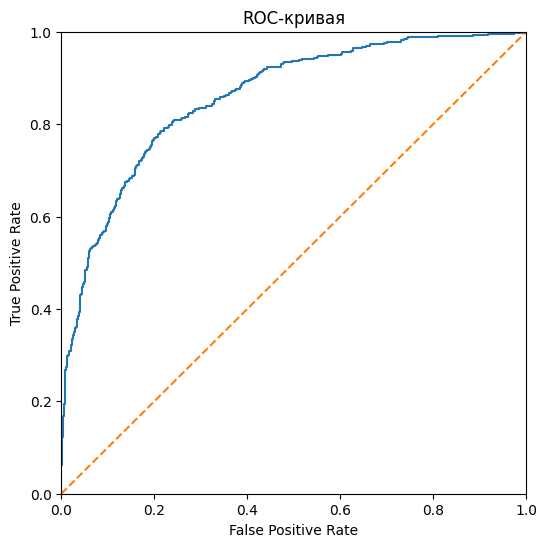

In [74]:
fpr, tpr, thresholds =roc_curve(target_test, probabilities_one_test)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >

plt.show()

Кривая помогает выбрать самое лучшее соотношение TPR с FPR

<div class="alert alert-info" role="alert">
Вывод:
    1) F1 в нашей тестовой модели больше 59% 
    2) ROC-AUC показал очень хороший результат в 86% 

<div class="alert alert-info" role="alert">
   <p> Итоговый вывод:
<p>1) Изучили задание и выгрузили все нужные нам библиотеки.
<p>2) При изучения датафрейма столкнулись с пропусками в столбце "Tenure" . Удалить , заменить на среднее или медиану являлось бы ошибкой . Я приняла решиние заменить на 0.
<p>3) Так же мы заменили тип данных в этом столбце на (int). Нам не нужны были данные с плавающей точкой.
<p>4)Удалили столбцы не нужные, не имеют для нас существенного интереса ['RowNumber','CustomerId', 'Surname']
<p>5) Техникой ОНЕ категориальные признаки перевели в численные 
<p>6) Выеделили целевой признак и признаки. Разделили на 3 модели (Обучаящая, валидационная, тестовая ) в соотношении 3:1:1
<p>7) Провели масштабирование выборок
<p>8) Accuracy лучшей модели оказался "Случаный лес"
<p>9)Разобрали несколько вариантов борьбы с дисбалансом : взвешивание классов upsampling и downsampling
<p>10)Далее, наилучшая модель была протестирована на тестовой выборке.
Значения ключевых метрик получились следующие:

   <p>F1-score = 0.61 (выше необходимого значения)
   <p> AUC-ROC = 0.86 (достаточно близко к единице)


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*